Author: Jacek Kozakowski

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# Importing and clearing data

In [2]:
import kagglehub
import os
# Download latest version
path = kagglehub.dataset_download("blastchar/telco-customer-churn")

df_CC = pd.read_csv(os.path.join(path,"WA_Fn-UseC_-Telco-Customer-Churn.csv"))

/opt/homebrew/Cellar/jupyterlab/4.3.6/libexec/lib/python3.13/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [3]:
df_CC.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


Let's drop `customerID` column. It is a unique identifier column, so it will be insignificant in further analysis

In [4]:
df_CC.drop("customerID", axis = 1, inplace=True)

Let's check types of data in our dataset using `.info()` function on dataframe:

In [5]:
df_CC.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7043 non-null   object 
 1   SeniorCitizen     7043 non-null   int64  
 2   Partner           7043 non-null   object 
 3   Dependents        7043 non-null   object 
 4   tenure            7043 non-null   int64  
 5   PhoneService      7043 non-null   object 
 6   MultipleLines     7043 non-null   object 
 7   InternetService   7043 non-null   object 
 8   OnlineSecurity    7043 non-null   object 
 9   OnlineBackup      7043 non-null   object 
 10  DeviceProtection  7043 non-null   object 
 11  TechSupport       7043 non-null   object 
 12  StreamingTV       7043 non-null   object 
 13  StreamingMovies   7043 non-null   object 
 14  Contract          7043 non-null   object 
 15  PaperlessBilling  7043 non-null   object 
 16  PaymentMethod     7043 non-null   object 


We can see that `TotalCharges` columns is an object type column. It is because there are occurences of empty strings for rows where `tenure` is 0. I'm going to replace the ' ' with NaN values, change column data type to float and then drop the rows with NaN values. I'm doing this because it means that the client just joined.

In [6]:
df_CC['TotalCharges'] = df_CC['TotalCharges'].replace(' ', np.nan)
df_CC['TotalCharges'] = df_CC['TotalCharges'].astype(float)
df_CC.dropna(subset=['TotalCharges'], inplace=True)
df_CC['TotalCharges'].info()

<class 'pandas.core.series.Series'>
Index: 7032 entries, 0 to 7042
Series name: TotalCharges
Non-Null Count  Dtype  
--------------  -----  
7032 non-null   float64
dtypes: float64(1)
memory usage: 109.9 KB


We can see now that `TotalCharges` is of type float. Dropping the NaN columns will not have a major effect on analysis, because we dropped only 11 rows that wouldn't have mattered anyways.<br>
Now let's check how many different values are in the object type columns:

In [7]:
columns = [col for col in df_CC.columns if isinstance(df_CC[col][0], str)] #Getting all columns that have string type values in them
for col in columns:
    print(df_CC[col].value_counts())

gender
Male      3549
Female    3483
Name: count, dtype: int64
Partner
No     3639
Yes    3393
Name: count, dtype: int64
Dependents
No     4933
Yes    2099
Name: count, dtype: int64
PhoneService
Yes    6352
No      680
Name: count, dtype: int64
MultipleLines
No                  3385
Yes                 2967
No phone service     680
Name: count, dtype: int64
InternetService
Fiber optic    3096
DSL            2416
No             1520
Name: count, dtype: int64
OnlineSecurity
No                     3497
Yes                    2015
No internet service    1520
Name: count, dtype: int64
OnlineBackup
No                     3087
Yes                    2425
No internet service    1520
Name: count, dtype: int64
DeviceProtection
No                     3094
Yes                    2418
No internet service    1520
Name: count, dtype: int64
TechSupport
No                     3472
Yes                    2040
No internet service    1520
Name: count, dtype: int64
StreamingTV
No                     2809
Y

There are a lot of categorical (object type) variables. We will need to encode them so we can analyze the data and make predictions efficiently. <br>
First let's map the columns were there are only 2 categories.

In [8]:
yes_no_columns = [col for col in df_CC.columns if set(df_CC[col].unique()) <= {'Yes', 'No'}] # Making a list of columns where there are only Yes or No values
for col in yes_no_columns:
    df_CC[col] = df_CC[col].map({'Yes' : 1, 'No' : 0})

# Mapping gender columns 0 = male, 1 = female
df_CC['gender'] = df_CC['gender'].map({'Male' : 0, 'Female' : 1})

df_CC.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7032 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7032 non-null   int64  
 1   SeniorCitizen     7032 non-null   int64  
 2   Partner           7032 non-null   int64  
 3   Dependents        7032 non-null   int64  
 4   tenure            7032 non-null   int64  
 5   PhoneService      7032 non-null   int64  
 6   MultipleLines     7032 non-null   object 
 7   InternetService   7032 non-null   object 
 8   OnlineSecurity    7032 non-null   object 
 9   OnlineBackup      7032 non-null   object 
 10  DeviceProtection  7032 non-null   object 
 11  TechSupport       7032 non-null   object 
 12  StreamingTV       7032 non-null   object 
 13  StreamingMovies   7032 non-null   object 
 14  Contract          7032 non-null   object 
 15  PaperlessBilling  7032 non-null   int64  
 16  PaymentMethod     7032 non-null   object 
 17  

That looks better. Now let's encode the rest of the categorical columns using `One-Hot Encoding`. For this we will use Pandas `.get_dummies` method.

In [9]:
columns_to_encode = [col for col in df_CC.columns if len(set(df_CC[col].unique())) > 2 and isinstance(df_CC[col][0],str)]
df_CC = pd.get_dummies(df_CC, columns=columns_to_encode)
df_CC.columns = df_CC.columns.str.replace(' ', '_')
df_CC[df_CC.select_dtypes(include='bool').columns] = df_CC.select_dtypes(include='bool').astype(int)
df_CC.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7032 entries, 0 to 7042
Data columns (total 41 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   gender                                   7032 non-null   int64  
 1   SeniorCitizen                            7032 non-null   int64  
 2   Partner                                  7032 non-null   int64  
 3   Dependents                               7032 non-null   int64  
 4   tenure                                   7032 non-null   int64  
 5   PhoneService                             7032 non-null   int64  
 6   PaperlessBilling                         7032 non-null   int64  
 7   MonthlyCharges                           7032 non-null   float64
 8   TotalCharges                             7032 non-null   float64
 9   Churn                                    7032 non-null   int64  
 10  MultipleLines_No                         7032 non-nul

In [10]:
df_CC.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,PaperlessBilling,MonthlyCharges,TotalCharges,Churn,...,StreamingMovies_No,StreamingMovies_No_internet_service,StreamingMovies_Yes,Contract_Month-to-month,Contract_One_year,Contract_Two_year,PaymentMethod_Bank_transfer_(automatic),PaymentMethod_Credit_card_(automatic),PaymentMethod_Electronic_check,PaymentMethod_Mailed_check
0,1,0,1,0,1,0,1,29.85,29.85,0,...,1,0,0,1,0,0,0,0,1,0
1,0,0,0,0,34,1,0,56.95,1889.50,0,...,1,0,0,0,1,0,0,0,0,1
2,0,0,0,0,2,1,1,53.85,108.15,1,...,1,0,0,1,0,0,0,0,0,1
3,0,0,0,0,45,0,0,42.30,1840.75,0,...,1,0,0,0,1,0,1,0,0,0
4,1,0,0,0,2,1,1,70.70,151.65,1,...,1,0,0,1,0,0,0,0,1,0


# Statistical Analysis
Now that the data is clear we can move on to analyzing data to find patterns. For this we will use:
- Box plots
- Bar plots
- Correlation heatmap
- Pie charts

First let's check what percentage of customer churned

Churn
0    73.421502
1    26.578498
Name: proportion, dtype: float64


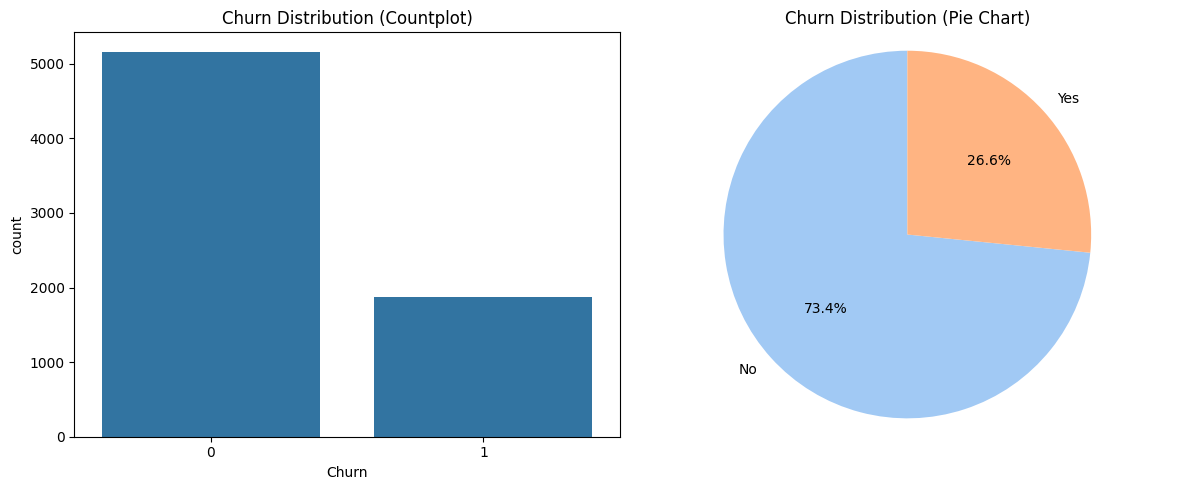

In [11]:
# Calculating churn rate
churn_rate = df_CC['Churn'].value_counts(normalize=True) * 100
print(churn_rate)

fig, axs = plt.subplots(1, 2, figsize=(12, 5))

sns.countplot(data=df_CC, x='Churn', ax=axs[0])
axs[0].set_title('Churn Distribution (Countplot)')

# Pie chart
labels = ["Yes" if churn == 1 else "No" for churn in churn_rate.index]
sizes = churn_rate.values
axs[1].pie(sizes, labels=labels, autopct='%1.1f%%', startangle=90, colors=sns.color_palette('pastel'))
axs[1].axis('equal')  # Equal aspect ratio for a perfect circle
axs[1].set_title('Churn Distribution (Pie Chart)')

plt.tight_layout()
plt.show()

plt.show()

We can see that `Churn` isn't evenly distributed, with approximately 26% of customers having churned.
This indicates a moderate class imbalance, which could impact model performance if not addressed.
Therefore, we will apply techniques such as SMOTE (Synthetic Minority Over-sampling Technique) to balance the training data before building predictive models.

## Tenure, Monthly Charges and Total Charges vs Churn rate boxplots
First, I will explore how the numerical variables `tenure`, `MonthlyCharges`, and `TotalCharges` are distributed across customers who churned and those who stayed. I picked these three columns because — just thinking logically — how long someone stays, how much they pay monthly, and how much they’ve paid in total should all have some connection to whether they leave or not.

By using boxplots, I aim to:
- Detect potential differences in distributions between the churned and non-churned groups.
- Identify whether longer tenure or higher total charges correlate with lower churn probability.
- Understand how monthly charges relate to the likelihood of churn.

Observing the shape and spread of these distributions can help us generate hypotheses about which factors may influence customer retention. 

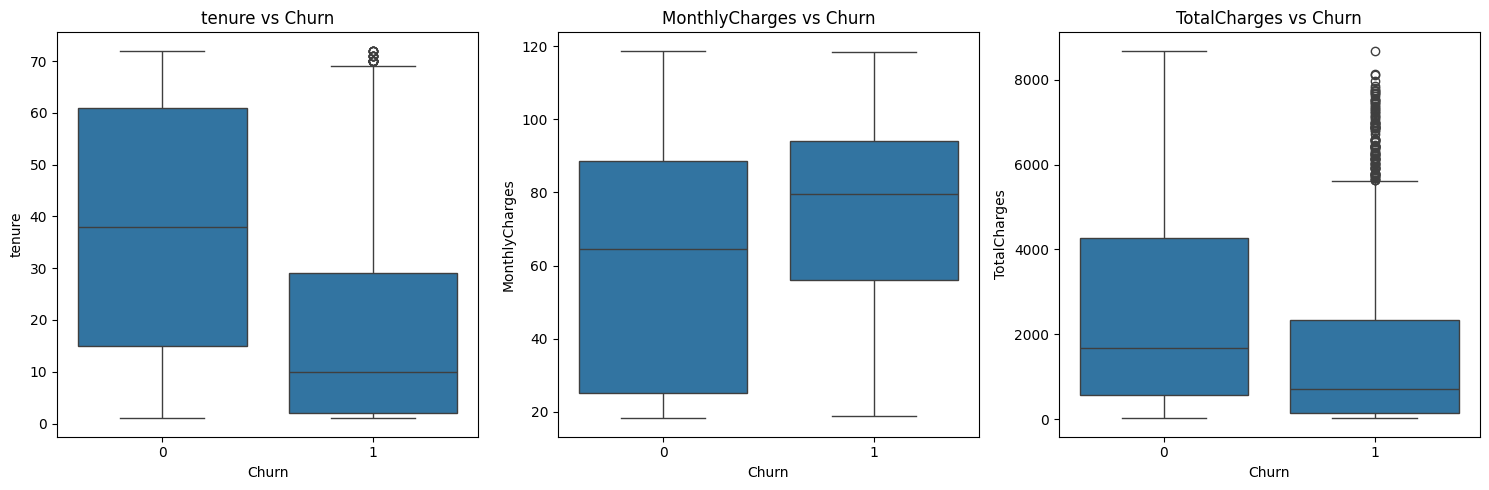

In [12]:
features = ['tenure', 'MonthlyCharges', 'TotalCharges']

plt.figure(figsize=(15, 5))

for i, feature in enumerate(features):
    plt.subplot(1, len(features), i + 1)
    sns.boxplot(x='Churn', y=feature, data=df_CC)
    plt.title(f'{feature} vs Churn')

plt.tight_layout()
plt.show()

## Tenure, Monthly Charges and Total Charges vs Churn rate probability barplots
The boxplots for `tenure`, `MonthlyCharges`, and `TotalCharges` show clear differences between customers who churned and those who stayed:

- Customers with **longer tenure** are much less likely to churn.
- Those who churn often have **higher monthly charges**.
- **TotalCharges** is noticeably lower for churned customers, which makes sense as they tend to leave early.

These trends suggest potential relationships between churn and numerical features.  
To explore this further, we’ll now examine how **churn probability changes across value ranges** using bar plots.

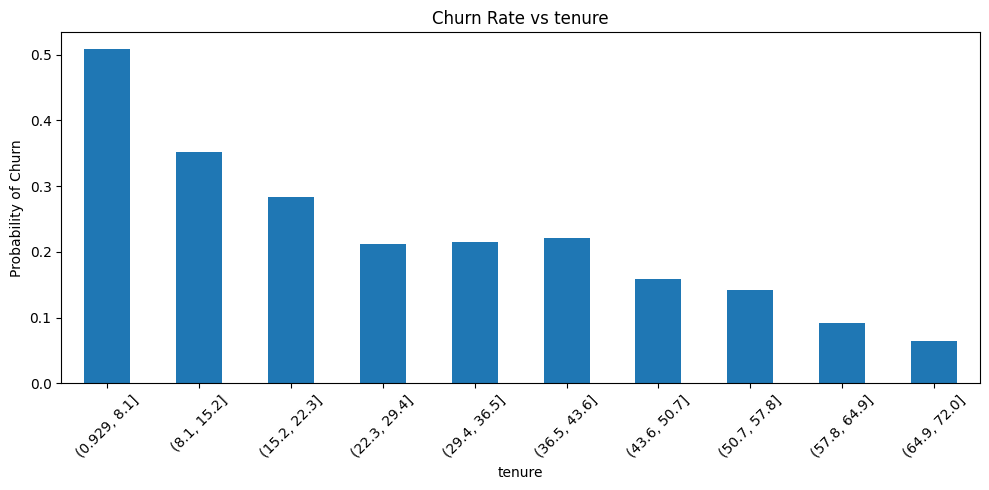

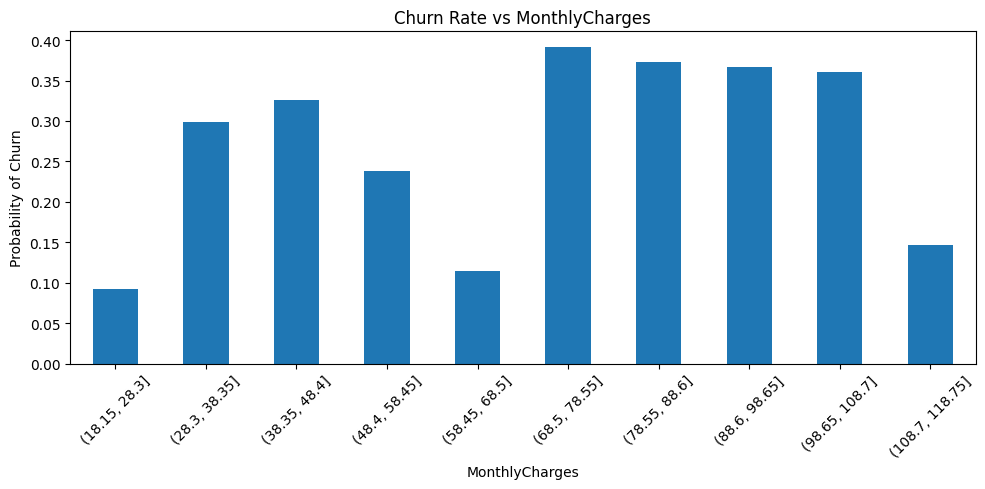

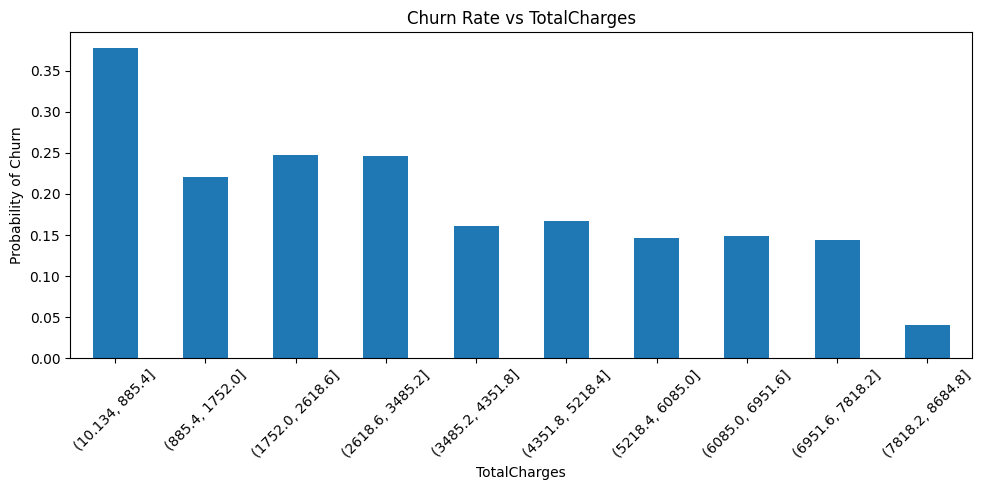

In [13]:
columns = ['tenure', 'MonthlyCharges', 'TotalCharges'] # List of columns to make bar plot

for col in columns:
    # Creating bins
    bins = pd.cut(df_CC[col], bins=10)
    
    # Grouping dataframe by bins
    bin_means = df_CC.groupby(bins, observed=True)['Churn'].mean()
    
    bin_means.plot(kind='bar', figsize=(10, 5))
    plt.ylabel('Probability of Churn')
    plt.title(f'Churn Rate vs {col}')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

Based on the bar plots, we can observe the following:

- **Tenure**: Churn probability clearly decreases with longer tenure.  
  ➤ Long-term customers are much less likely to leave.
- **MonthlyCharges**: Churn probability increases noticeably among customers with higher monthly charges.  
  ➤ Customers paying more than around \$70 per month are significantly more likely to churn.
- **TotalCharges**: A similar pattern appears here — customers who have paid more overall tend to stay.  
  ➤ Higher total charges reflect stronger customer relationships.

This pattern may partially reflect behavioral factors, such as the **sunk cost fallacy** —  
customers who have already paid more over time might feel more committed and less willing to cancel their subscription.

## Correlation
There are a lot of variables so it would be good to figure out which variables have the biggest correlation with `Churn`.

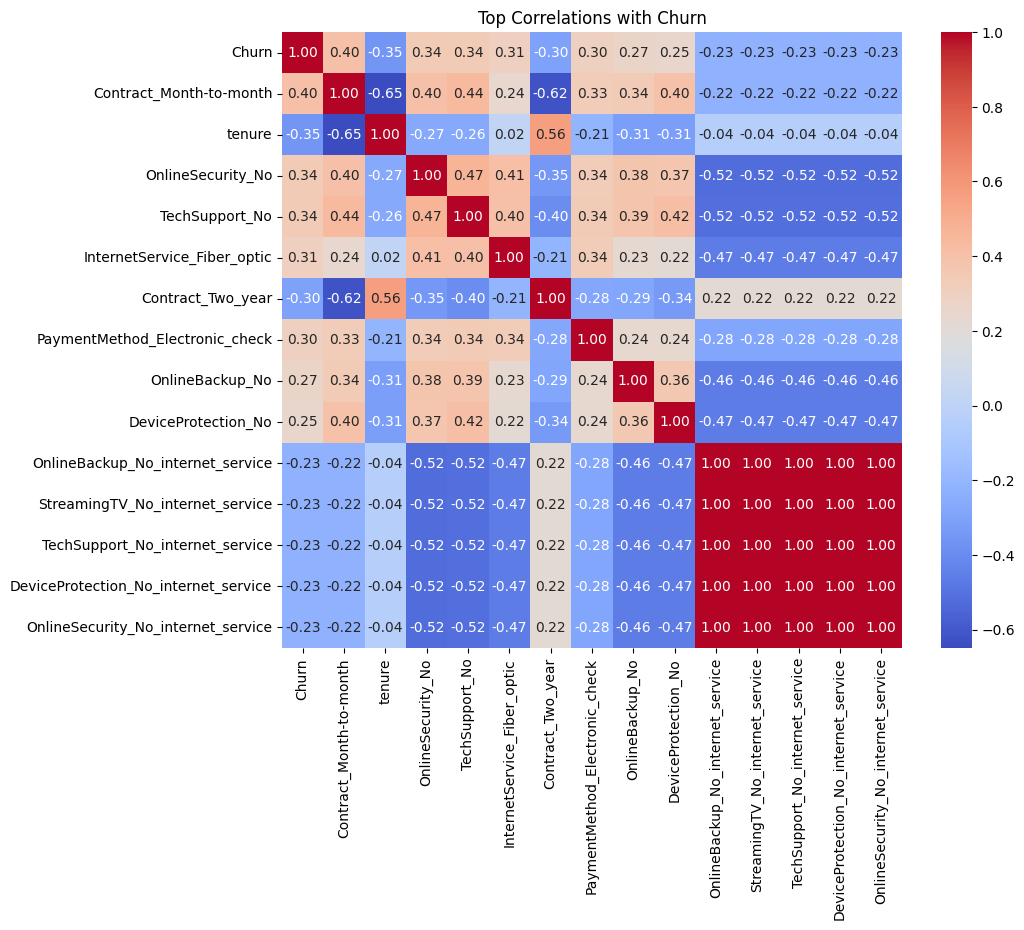

In [14]:
corr = df_CC.corr(numeric_only=True) # Making a correlation matrix

top_corr = corr['Churn'].abs().sort_values(ascending=False).head(15).index # Getting top 15 correlations with Churn

small_corr = df_CC[top_corr].corr()

plt.figure(figsize=(10, 8))
sns.heatmap(small_corr, annot=True, cmap='coolwarm', fmt='.2f')
plt.title("Top Correlations with Churn")
plt.show()

## Contract vs Churn rate nested pie plot

We can see the biggest correlation occurs for `Contract_Month-to-month`. Let's plot a pie chart and check how does contract choice affect customer churn.

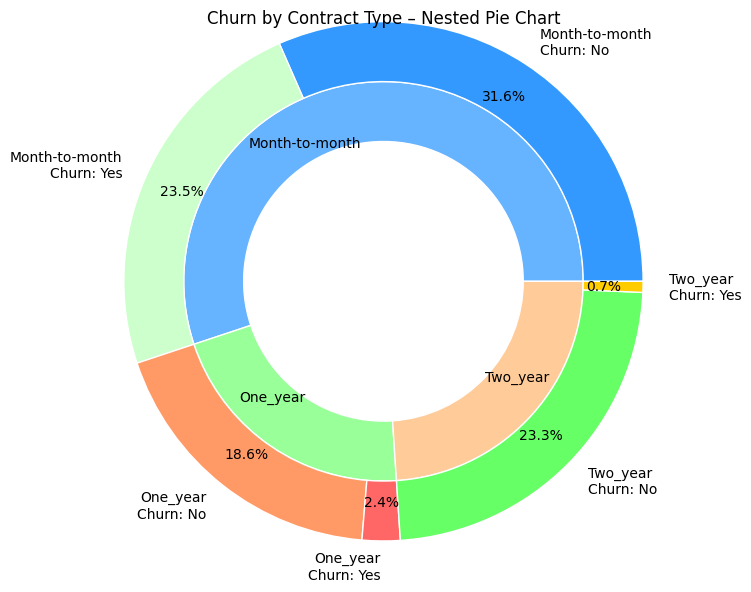

In [15]:
df_temp = df_CC.copy()
df_temp['Contract'] = df_temp[['Contract_Month-to-month', 'Contract_One_year', 'Contract_Two_year']].idxmax(axis=1)
df_temp['Contract'] = df_temp['Contract'].str.replace('Contract_', '')

# Grouping
outer_counts = df_temp.groupby(['Contract', 'Churn']).size()
inner_counts = df_temp['Contract'].value_counts().sort_index()

# Labels
outer_labels = [f"{contract}\nChurn: {'Yes' if churn == 1 else 'No'}" for contract, churn in outer_counts.index]
inner_labels = inner_counts.index.tolist()

# Colors 
inner_colors = ['#66b3ff', '#99ff99', '#ffcc99']  
outer_colors = ['#3399ff', '#ccffcc', '#ff9966', '#ff6666', '#66ff66', '#ffcc00'][:len(outer_counts)]

fig, ax = plt.subplots(figsize=(8, 6))

# Inner circle (type of contract)
ax.pie(inner_counts,
       radius=1,
       labels=inner_labels,
       colors=inner_colors,
       labeldistance=0.7,
       wedgeprops=dict(width=0.3, edgecolor='white'))

# Outer circle 
ax.pie(outer_counts,
       radius=1.3,
       labels=outer_labels,
       autopct='%1.1f%%',
       colors=outer_colors,
       pctdistance=0.85,
       labeldistance=1.1,
       wedgeprops=dict(width=0.3, edgecolor='white'))

plt.title('Churn by Contract Type – Nested Pie Chart')
plt.tight_layout()
plt.show()

From this pie chart we get two important informations:
- The majority of customers pick **Month-To-Month** contract over long-term options
- Customers with Month-To-Month contract are **significantly more likely to churn** compared to customers to those on **One-Year** or **Two-Year** contracts

This suggest that encouring customers to pick longer contracts may reduce churn rates.

# Building and Evaluating Churn Prediction Models
In this section, we will build several machine learning models to predict customer churn.<br>
We will train and evaluate different algorithms, including `Logistic Regression`, `Random Forest`, and `XGBoost`, using both the original and SMOTE-balanced training datasets.<br>
Our goal is to identify the model that provides the best balance between precision, recall, and overall accuracy, while effectively handling the class imbalance observed in the data.

## Preparing train and test sets 
I will be using same sets across all models so we can get a fair comparison. First I'm going to create unbalanced train and test sets by splitting the data using Scikit-learn's `train_test_split`.<br> Next I will go on to create more balanced sets using `SMOTE` class from `imblearn.over_sampling` library.
## How does SMOTE work?
SMOTE (Synthetic Minority Over-sampling Technique) is a technique used to balance class distribution by creating synthetic examples for the minority class instead of simply duplicating existing ones.

Here’s how SMOTE works:
- It selects a sample from the minority class.
- It identifies the sample's nearest neighbors (typically 5).
- It randomly selects one of these neighbors and generates a new synthetic sample somewhere along the line connecting the original sample and its neighbor.
- This process is repeated until the minority class is sufficiently balanced with the majority class.

By generating new, slightly different examples, SMOTE helps the model learn better patterns without overfitting to duplicated data points.

In [16]:
# Imports
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE

# X and Y original data sets
X = df_CC[top_corr.drop('Churn')]
Y = df_CC['Churn']

# Train/test split
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

# Fit scaler on original X_train
scaler = StandardScaler()
scaler.fit(X_train)

# 1. Transform original train and test sets (without SMOTE)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

# 2. Apply SMOTE on original (unscaled) training data
smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

# 3. Transform SMOTE-resampled training set
X_train_smote_scaled = scaler.transform(X_train_smote)

# Checking class distributions
print("Original training distribution:\n", y_train.value_counts())
print("\nTraining distribution after SMOTE:\n", y_train_smote.value_counts())

Original training distribution:
 Churn
0    4130
1    1495
Name: count, dtype: int64

Training distribution after SMOTE:
 Churn
1    4130
0    4130
Name: count, dtype: int64


## How to interpret the results
In the next sections I will use 3 main metris to evalute the models' performance. Here is a quick note how to interpret the results.
## Confusion Matrix:
We use confusion matrix to see where the model made errors. It's a $2 \times 2$ matrix summarizing the outcome:
$$
\begin{bmatrix}
 \text{True Negative} & \text{False Positive} \\
 \text{False Negative} & \text{True Positive} 
 \end{bmatrix}
$$
Where:
- **True Negative** `TN` means model predicted that customer would not churn and he did not
- **False Positive** `FP` means model predicted that customer would churn, but he did not
- **False Negative** `FN` means model predicted that customer would not churn, but he did
- **True Positive** `TP` means model predicted that customer would churn and he did

## Precision score
Precision tells us how well the model avoids labeling a negative sample as positive.  
It is calculated using the following formula:

$$
\text{Precision} = \dfrac{\text{TP}}{\text{TP} + \text{FP}}
$$

Where:
- **TP** = True Positives
- **FP** = False Positives

Precision measures the percentage of correctly predicted churners among all customers predicted as churners.

## Classification Report

The classification report is a summary of key evaluation metrics for classification models.  
It helps to understand how well the model performs across each class, especially in imbalanced datasets like churn prediction.

The report includes the following metrics:

- **Precision**:  
  Out of all customers that the model predicted as churners, how many actually churned.  
  High precision means few false positives.

- **Recall**:  
  Out of all customers who actually churned, how many the model correctly identified.  
  High recall means few false negatives.

- **F1-score**:  
  The harmonic mean of precision and recall.  
  A high F1-score indicates a good balance between precision and recall.

- **Support**:  
  The number of true instances for each class in the dataset.  
  (e.g., number of customers who actually churned and who stayed.)

Additionally, the report shows:

- **Accuracy**:  
  The overall percentage of correctly classified examples.

- **Macro average (macro avg)**:  
  The average precision, recall, and F1-score calculated independently for each class, without considering class imbalance.

- **Weighted average (weighted avg)**:  
  The average precision, recall, and F1-score weighted by the number of true instances for each class.  
  This provides a more realistic view when classes are imbalanced.

The classification report provides a detailed breakdown of model performance, helping to analyze whether the model is better at predicting one class over another and how it handles imbalanced data.<br>
I made this helper function to plot a heatmap for confusion matrix:

In [17]:
def confusion_heatmap(y_test, y_pred):
    cm = confusion_matrix(y_test, y_pred)
    cm_sum = np.sum(cm)
    cm_perc = cm / cm_sum * 100

    labels = ['No Churn', 'Churn']
    annot = np.empty_like(cm).astype(str)

    nrows, ncols = cm.shape
    for i in range(nrows):
        for j in range(ncols):
            c = cm[i,j]
            p = cm_perc[i,j]
            annot[i,j] = f'{c}'

    plt.figure(figsize=(5,4))
    sns.heatmap(cm, cmap='Blues', annot=annot, fmt='', xticklabels=labels, yticklabels=labels)
    plt.xlabel('Predicted Label')
    plt.ylabel('Actual Label')
    plt.title('Confusion Matrix')
    plt.show()

def true_predicted_distribution(y_test, y_pred):
    plt.figure(figsize=(8, 5))
    
    sns.kdeplot(y_test, color='red', label='Actual Values', linewidth=2, fill=True, alpha=0.3)
    sns.kdeplot(y_pred, color='blue', label='Predicted Values', linewidth=2, fill=True, alpha=0.3)
    
    plt.title('Distribution of Actual vs Predicted Values')
    plt.xlabel('Class (0 = No Churn, 1 = Churn)')
    plt.ylabel('Density')
    plt.legend()
    plt.grid(True, linestyle='--', alpha=0.5)
    plt.xlim(-0.2, 1.2)
    plt.tight_layout()
    plt.show()

from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score
results = []

def gather_scores(model_name, y_test, y_pred):
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    accuracy = accuracy_score(y_test, y_pred)
    
    results.append({
        'Model': model_name,
        'Precision': precision,
        'Recall': recall,
        'F1-score': f1,
        'Accuracy': accuracy
    })

def get_results_dataframe():
    return pd.DataFrame(results)

## Logistic Regression

Logistic Regression is a simple yet powerful classification algorithm that models the probability of a binary outcome.  
It estimates the relationship between input features and the probability that a given input belongs to the positive class (in this case, churn).  
Unlike linear regression, it applies a logistic (sigmoid) function to keep predictions between 0 and 1.

We use logistic regression as a baseline model because:
- It is fast to train and interpret.
- It performs reasonably well even with unbalanced data.
- It allows us to quickly understand which features are most influential through their coefficients.

First, let's fit the model on the unbalanced dataset without any adjustments like SMOTE.

In [18]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.model_selection import cross_val_score

# Model fitted with unbalanced training set
lr_model = LogisticRegression(max_iter=1000, random_state=42)
lr_model.fit(X_train_scaled, y_train)
y_pred = lr_model.predict(X_test_scaled)
gather_scores('Logistic Regression', y_test, y_pred)

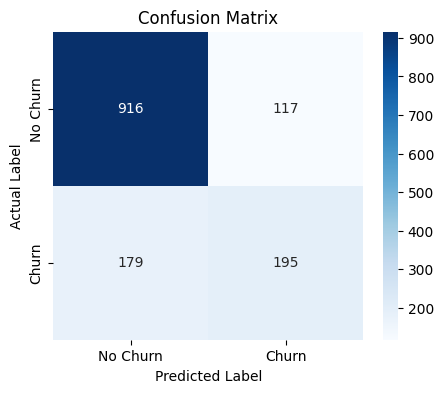

Precision score: 
 0.625
Classification report:
               precision    recall  f1-score   support

           0       0.84      0.89      0.86      1033
           1       0.62      0.52      0.57       374

    accuracy                           0.79      1407
   macro avg       0.73      0.70      0.71      1407
weighted avg       0.78      0.79      0.78      1407



In [19]:
confusion_heatmap(y_test, y_pred)
print("Precision score: \n",precision_score(y_test, y_pred))
print("Classification report:\n",classification_report(y_test, y_pred))

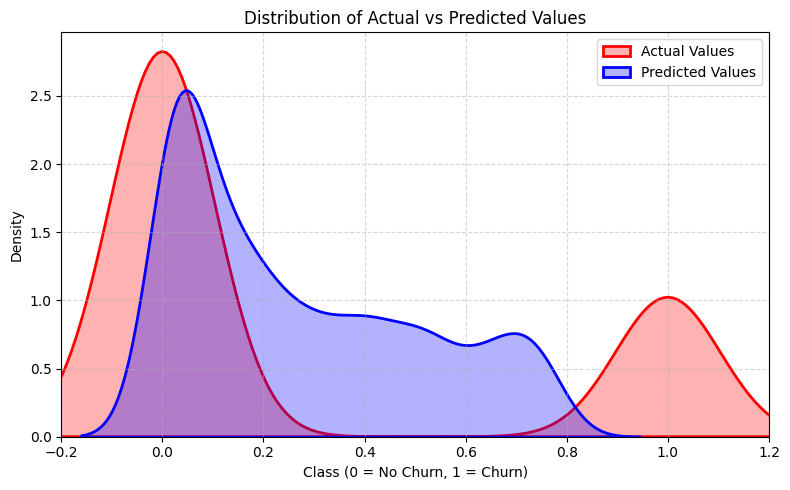

In [20]:
true_predicted_distribution(y_test, lr_model.predict_proba(X_test_scaled)[:,1])

The scores are decent, we predicted that customer will churn with precision of 0.625. Now let's try fitting the model with balanced data.

In [21]:
lr_smote = LogisticRegression(max_iter=1000, random_state=42)
lr_smote.fit(X_train_smote_scaled, y_train_smote)
y_pred = lr_smote.predict(X_test_scaled)
gather_scores('Logistic Regression SMOTE', y_test, y_pred)

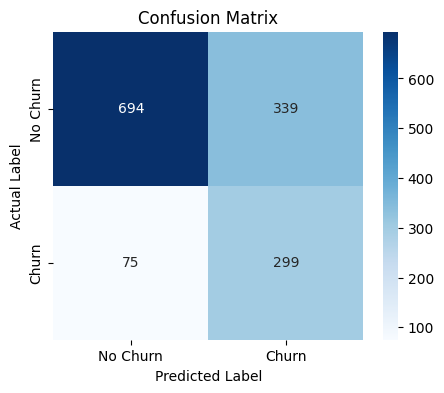

Precision score: 
 0.46865203761755486
Classification report:
               precision    recall  f1-score   support

           0       0.90      0.67      0.77      1033
           1       0.47      0.80      0.59       374

    accuracy                           0.71      1407
   macro avg       0.69      0.74      0.68      1407
weighted avg       0.79      0.71      0.72      1407



In [22]:
confusion_heatmap(y_test, y_pred)
print("Precision score: \n",precision_score(y_test, y_pred))
print("Classification report:\n",classification_report(y_test, y_pred))

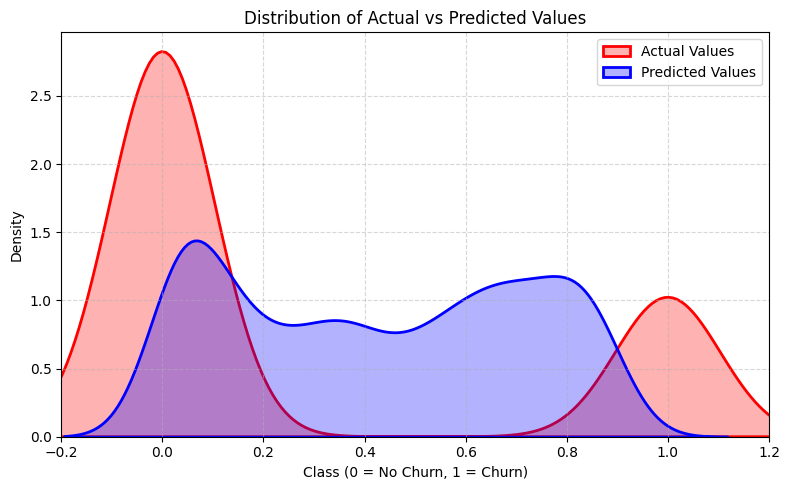

In [23]:
true_predicted_distribution(y_test, lr_smote.predict_proba(X_test_scaled)[:,1])

## Logistic Regression Results - Summary

### Without SMOTE
- The Logistic Regression model trained on the original (unbalanced) dataset achieved an accuracy of approximately **79%**.
- The model showed a **precision of 0.62** and **recall of 0.52** for the churn class.
- This means that although the model was relatively good at minimizing false positives, it struggled to correctly identify all churners, missing nearly half of them.
- Overall, the model was cautious and conservative, preferring not to predict churn unless it was very certain.

### With SMOTE
- After applying SMOTE to balance the training dataset, the Logistic Regression model achieved a lower accuracy of approximately **68%**.
- However, the **recall for the churn class increased significantly to 0.86**, meaning the model could now detect most customers who actually churned.
- Precision dropped to **0.44**, indicating a higher rate of false positives — the model now flagged many customers as churners who did not actually churn.
- This behavior is expected after applying SMOTE, as the model becomes more aggressive in identifying churners.

### Conclusions
- Applying SMOTE leads to a significant improvement in **recall**, which is critical in churn prediction scenarios where missing a churner can be costly.
- However, the trade-off is a reduction in **precision** and **overall accuracy**.
- Depending on the business objective (whether minimizing false positives or capturing as many churners as possible is more important), one approach may be preferred over the other.
- Further experiments with other models (such as Random Forest or XGBoost) and threshold tuning are recommended to improve the balance between precision and recall.

In simpler words:
- A model trained on the unbalanced training set is less likely to detect a churner, but when it does, the prediction is more likely to be correct.
- A model trained on the SMOTE-balanced training set is much more likely to detect a churner, but the predictions are less reliable.


## Random Forest Classification

Random Forest is an ensemble learning method that builds multiple decision trees and combines their predictions to improve accuracy and stability.  
It reduces the risk of overfitting compared to a single decision tree by averaging the results across many trees.

We use Random Forest because:
- It handles both unbalanced and balanced datasets well.
- It automatically captures non-linear relationships between features.
- It provides feature importance scores, helping to understand which variables impact churn the most.

First, let's fit the Random Forest model on the unbalanced training set.

In [24]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

rf_model = RandomForestClassifier(random_state=42)

param_grid = {
    'n_estimators': [85, 90, 95],
    'max_depth': [5, 10, 15],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['sqrt', 'log2'],
    'class_weight': ['balanced']
}
grid_search = GridSearchCV(
    estimator=rf_model,
    param_grid=param_grid,
    scoring='recall',  
    cv=5,
    n_jobs=-1, 
    verbose=0
)
grid_search.fit(X_train_scaled, y_train)
print("Best parameters:",grid_search.best_params_)
rf_model.set_params(**grid_search.best_params_)

rf_model.fit(X_train_scaled, y_train)
y_pred = rf_model.predict(X_test_scaled)
gather_scores('Random Forest', y_test, y_pred)

Best parameters: {'class_weight': 'balanced', 'max_depth': 5, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 85}


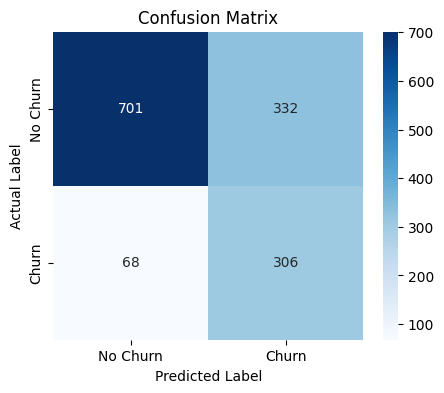

Precision score: 
 0.47962382445141066
Classification report:
               precision    recall  f1-score   support

           0       0.91      0.68      0.78      1033
           1       0.48      0.82      0.60       374

    accuracy                           0.72      1407
   macro avg       0.70      0.75      0.69      1407
weighted avg       0.80      0.72      0.73      1407



In [25]:
confusion_heatmap(y_test, y_pred)
print("Precision score: \n",precision_score(y_test, y_pred))
print("Classification report:\n",classification_report(y_test, y_pred))

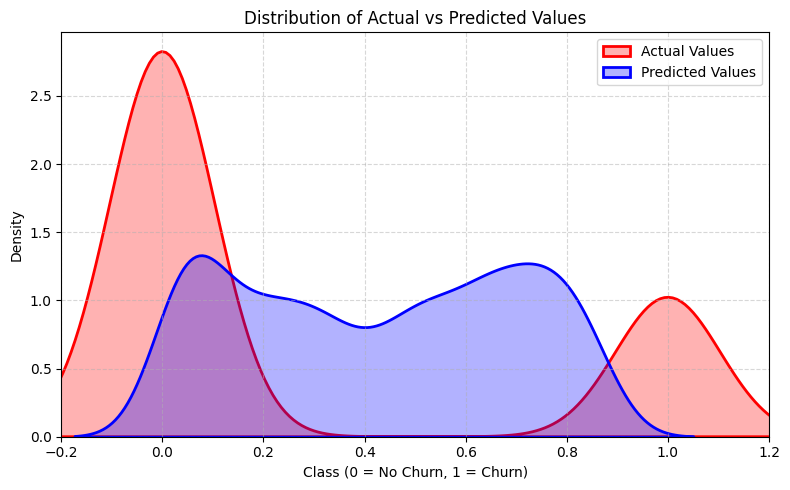

In [26]:
true_predicted_distribution(y_test, rf_model.predict_proba(X_test_scaled)[:,1])

Now, let's evaluate how the Random Forest classifier performs when trained on SMOTE-balanced data.

In [27]:
rf_smote = RandomForestClassifier(n_estimators= 100, max_depth= 5, random_state = 42)

param_grid = {
    'n_estimators': [85, 90, 100],
    'max_depth': [5, 10, 15],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['sqrt', 'log2'],
    'class_weight': ['balanced']
}

grid_search = GridSearchCV(
    estimator=rf_smote,
    param_grid=param_grid,
    scoring='recall',  
    cv=5,
    n_jobs=-1, 
    verbose=0
)

grid_search.fit(X_train_smote_scaled, y_train_smote)
print("Best parameters:",grid_search.best_params_)
rf_smote.set_params(**grid_search.best_params_)

rf_smote.fit(X_train_smote_scaled, y_train_smote)
y_pred = rf_smote.predict(X_test_scaled)
gather_scores('Random Forest SMOTE', y_test, y_pred)

Best parameters: {'class_weight': 'balanced', 'max_depth': 15, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 90}


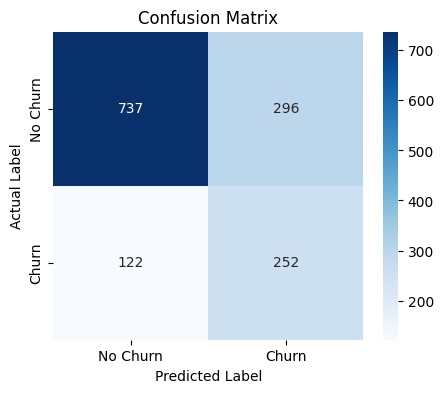

Precision score: 
 0.45985401459854014
Classification report:
               precision    recall  f1-score   support

           0       0.86      0.71      0.78      1033
           1       0.46      0.67      0.55       374

    accuracy                           0.70      1407
   macro avg       0.66      0.69      0.66      1407
weighted avg       0.75      0.70      0.72      1407



In [28]:
confusion_heatmap(y_test, y_pred)
print("Precision score: \n",precision_score(y_test, y_pred))
print("Classification report:\n",classification_report(y_test, y_pred))

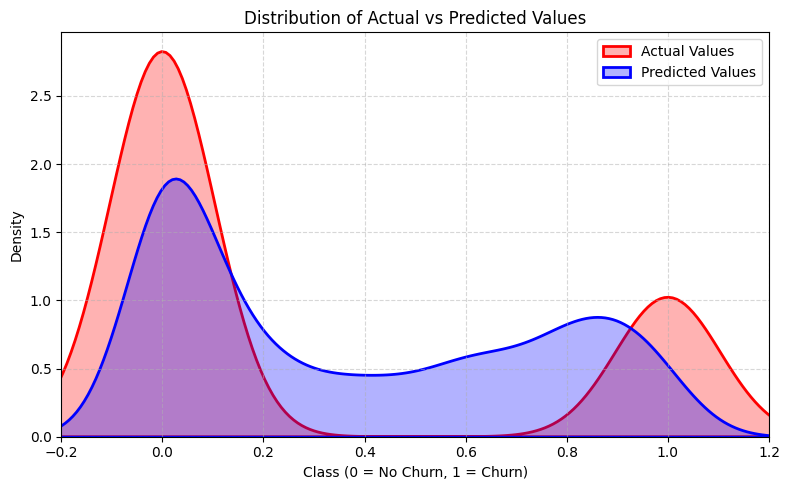

In [29]:
true_predicted_distribution(y_test, rf_smote.predict_proba(X_test_scaled)[:,1])

### Without SMOTE
- The Random Forest model trained on the unbalanced dataset achieved an accuracy of approximately **71%**.
- It reached a **recall of 0.82** for the churn class, indicating that it was able to correctly identify most customers who churned.
- Precision was lower, around **0.48**, meaning that many predicted churners did not actually churn.
- The model is clearly focused on catching as many churners as possible, even at the cost of more false alarms.

### With SMOTE
- After applying SMOTE, the accuracy remained close to **70%**.
- Recall decreased slightly to **0.67**, and precision stayed around **0.46**.
- The model appears to be more balanced compared to the unbalanced version, but the changes are not dramatic.
- SMOTE did not significantly alter the model’s performance, and in this case, the unbalanced data might already be suitable.

### Observations
- Random Forest demonstrates strong recall in both versions, which is useful for detecting churn.
- However, the precision remains relatively low, indicating a higher number of false positives.
- The trade-off between recall and precision is visible, and further tuning might help refine the predictions.

## XGB model
XGBoost (Extreme Gradient Boosting) is a powerful and efficient machine learning algorithm based on boosting decision trees.  
It is known for its high accuracy, speed, and ability to handle complex patterns in data.

We use XGBoost because:
- It often gives better results than other models.
- It can work well with both unbalanced and SMOTE-balanced data.
- It provides feature importance, helping to understand which factors drive churn.

First, let's train the XGBoost model on the unbalanced training set.

In [30]:
from xgboost import XGBClassifier

xgb_model = XGBClassifier(eval_metric='logloss', random_state=42)

param_grid = {
    'n_estimators': [85, 90, 95],
    'max_depth': [3, 5, 7],
    'learning_rate': [0.01, 0.1, 0.2],
    'subsample': [0.8, 1.0],
    'colsample_bytree': [0.8, 1.0]
}

grid_search = GridSearchCV(
    estimator=xgb_model,
    param_grid=param_grid,
    scoring='recall',  
    cv=5,
    n_jobs=-1,
    verbose=0
)
grid_search.fit(X_train_scaled, y_train)
print("Best parameters:",grid_search.best_params_)
xgb_model.set_params(**grid_search.best_params_)

xgb_model.fit(X_train_scaled, y_train)
y_pred = xgb_model.predict(X_test_scaled)
gather_scores('XGB', y_test, y_pred)

Best parameters: {'colsample_bytree': 1.0, 'learning_rate': 0.1, 'max_depth': 5, 'n_estimators': 85, 'subsample': 1.0}


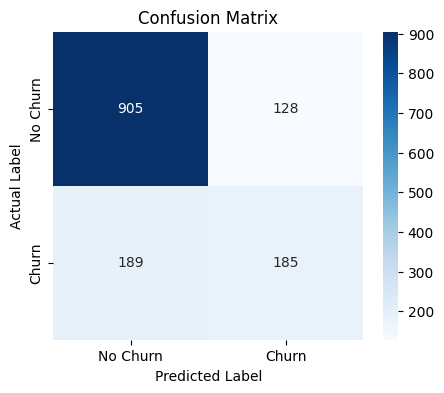

Precision score: 
 0.5910543130990416
Classification report:
               precision    recall  f1-score   support

           0       0.83      0.88      0.85      1033
           1       0.59      0.49      0.54       374

    accuracy                           0.77      1407
   macro avg       0.71      0.69      0.69      1407
weighted avg       0.76      0.77      0.77      1407



In [31]:
confusion_heatmap(y_test, y_pred)
print("Precision score: \n",precision_score(y_test, y_pred))
print("Classification report:\n",classification_report(y_test, y_pred))

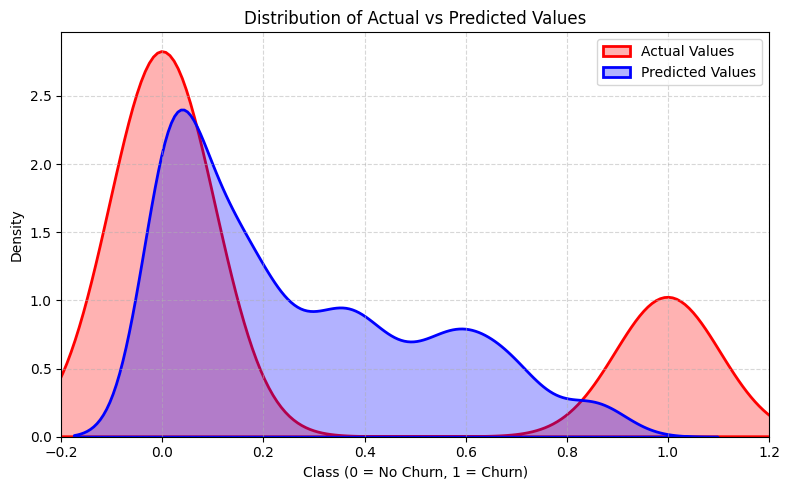

In [32]:
true_predicted_distribution(y_test, xgb_model.predict_proba(X_test_scaled)[:,1])

Now, let's evaluate how the XGB classifier will perform after being trained on SMOTE-balanced data.

In [33]:
xgb_smote = XGBClassifier(eval_metric='logloss', random_state=42)

param_grid = {
    'n_estimators': [ 90, 95, 100],
    'max_depth': [3, 5, 7],
    'learning_rate': [0.01, 0.1, 0.2],
    'subsample': [0.8, 1.0],
    'colsample_bytree': [0.8, 1.0]
}

grid_search = GridSearchCV(
    estimator=xgb_smote,
    param_grid=param_grid,
    scoring='recall',  
    cv=5,
    n_jobs=-1,
    verbose=0
)
grid_search.fit(X_train_smote_scaled, y_train_smote)
print("Best parameters:",grid_search.best_params_)
xgb_smote.set_params(**grid_search.best_params_)

xgb_smote.fit(X_train_smote_scaled, y_train_smote)
y_pred = xgb_smote.predict(X_test_scaled)
gather_scores('XGB SMOTE', y_test, y_pred)

Best parameters: {'colsample_bytree': 1.0, 'learning_rate': 0.2, 'max_depth': 7, 'n_estimators': 95, 'subsample': 1.0}


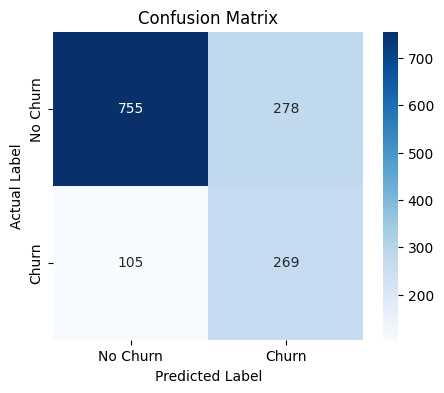

Precision score: 
 0.49177330895795246
Classification report:
               precision    recall  f1-score   support

           0       0.88      0.73      0.80      1033
           1       0.49      0.72      0.58       374

    accuracy                           0.73      1407
   macro avg       0.68      0.73      0.69      1407
weighted avg       0.78      0.73      0.74      1407



In [34]:
confusion_heatmap(y_test, y_pred)
print("Precision score: \n",precision_score(y_test, y_pred))
print("Classification report:\n",classification_report(y_test, y_pred))

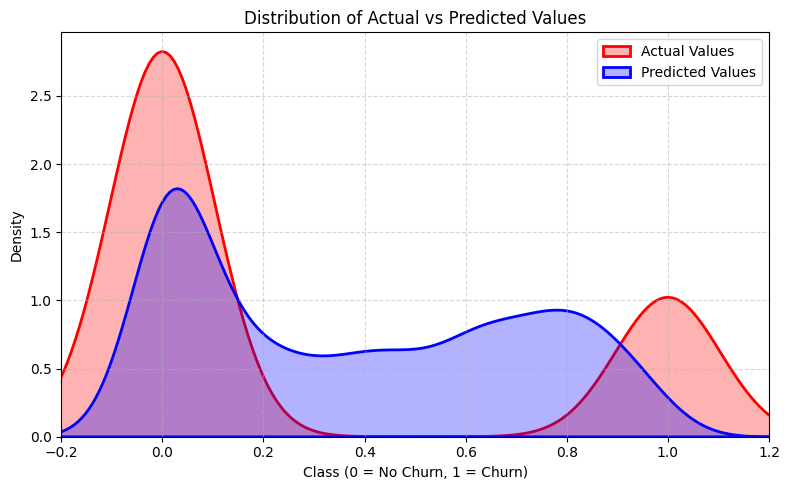

In [35]:
true_predicted_distribution(y_test, xgb_smote.predict_proba(X_test_scaled)[:,1])

### Without SMOTE
- The XGBoost model trained on the original dataset achieved an accuracy of around **77%**.
- Precision was **0.59**, and recall was **0.49**, showing that the model was slightly more conservative in predicting churn compared to Random Forest.
- It produced fewer false positives but missed more actual churners.
- The model seems to focus more on correctness when predicting churn, rather than detecting all possible churners.

### With SMOTE
- With SMOTE applied, accuracy dropped slightly to about **70%**.
- Recall improved to **0.72**, and precision remained stable at **0.49**.
- This version of the model became more aggressive in catching churners, while still maintaining a balanced precision level.
- The changes suggest that SMOTE helped XGBoost become more sensitive without introducing a major drop in reliability.

### Observations
- XGBoost offers a more balanced performance, especially when trained on SMOTE-balanced data.
- It does not prioritize recall as strongly as Random Forest, but provides more stable precision.
- Depending on the importance of recall versus precision, this model could be a strong candidate.


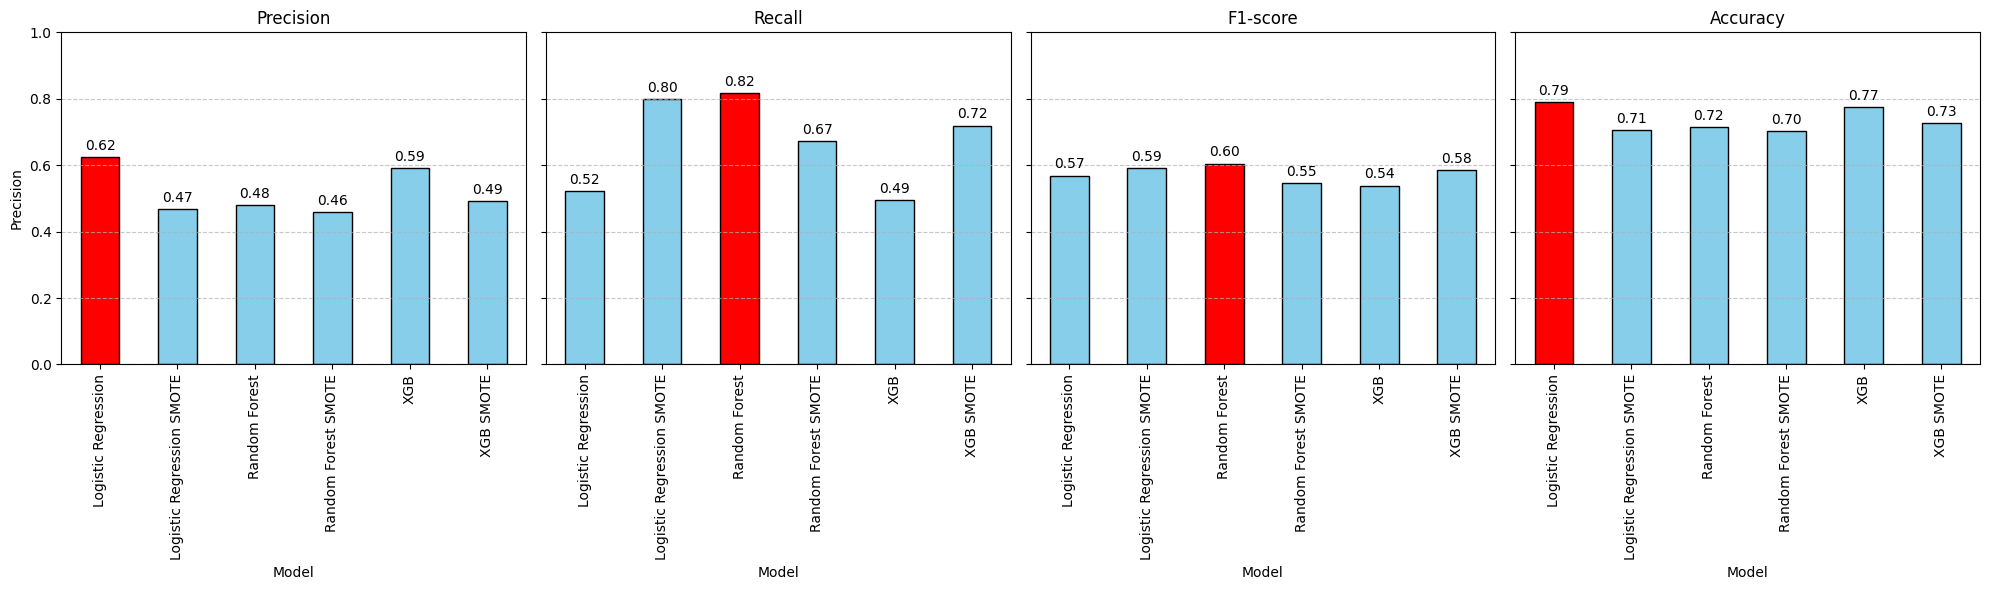

In [36]:
results_df = get_results_dataframe()
results_df.set_index('Model', inplace=True)

fig, axes = plt.subplots(1, len(results_df.columns), figsize=(5 * len(results_df.columns), 6), sharey=True)

for ax, col in zip(axes, results_df.columns):
    colors = ['red' if x == results_df[col].max() else 'skyblue' for x in results_df[col]]
    results_df[col].plot(kind='bar', ax=ax, title=col, color=colors, edgecolor='black')
    ax.set_xlabel('Model')
    ax.set_ylabel(col)
    ax.set_ylim(0, 1)
    ax.grid(axis='y', linestyle='--', alpha=0.7)
    ax.set_xticklabels(results_df.index)
    for container in ax.containers:
        ax.bar_label(container, fmt='%.2f', label_type='edge', padding=3)

plt.tight_layout()
plt.show()

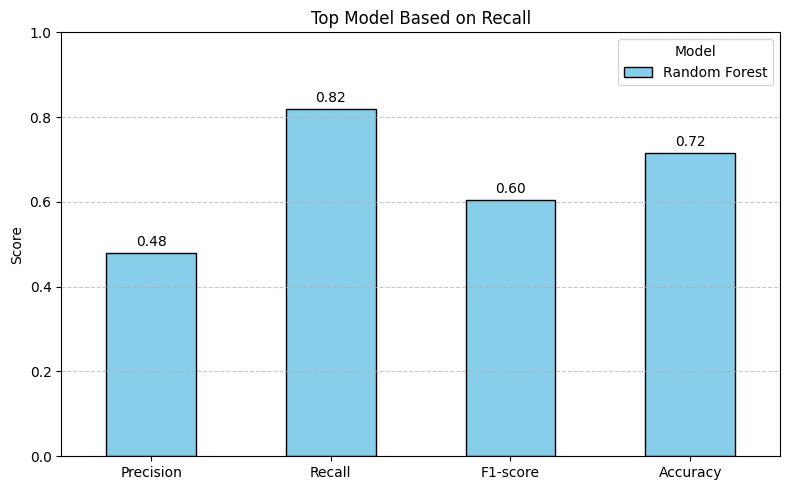

In [37]:
top_res = results_df.sort_values(by='Recall', ascending=False).head(1).transpose()

ax = top_res.plot(kind='bar', color='skyblue', edgecolor='black', figsize=(8, 5))
for container in ax.containers:
    ax.bar_label(container, fmt='%.2f', label_type='edge', padding=3)

ax.set_title('Top Model Based on Recall')
ax.set_ylabel('Score')
ax.set_ylim(0, 1)
ax.grid(axis='y', linestyle='--', alpha=0.7)
plt.xticks(rotation=0)

plt.tight_layout()
plt.show()

## Final Summary

In this project, I analyzed customer churn using Logistic Regression, Random Forest, and XGBoost models.  
Each model was trained and evaluated both on the original unbalanced data and on SMOTE-balanced data to address class imbalance.

Applying SMOTE helped improve recall for Logistic Regression and XGB but sometimes reduced overall precision and model stability.  
In particular, Random Forest trained on unbalanced data achieved the best recall without significantly sacrificing precision.

Since detecting churners (high recall) was prioritized over avoiding false positives,  
**Random Forest without SMOTE** was selected as the best model for identifying customers at risk of churning.

Further improvements could include fine-tuning decision thresholds, exploring additional resampling techniques, or adding new features.

Based on the results:
- **Random Forest** achieved the highest recall on the unbalanced dataset.
- **XGBoost** showed strong overall performance and slightly better precision.
- **Logistic Regression** provided a solid and interpretable baseline.

Since detecting churners is more important than minimizing false positives in this case, I prioritized models with higher **recall** scores.  
Therefore, **Random Forest trained on unbalanced data** was chosen as the best model for identifying customers at risk of churning.

Further improvements could be made by fine-tuning decision thresholds, using ensemble methods, or adding more feature engineering.
